# Exploring marathon finishing times

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')

In [3]:
df.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [4]:
df.split = pd.to_timedelta(df.split)
df.final = pd.to_timedelta(df.final)

In [5]:
df.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [6]:
# Add columns for split and final in seconds
df['split_min'] = df.split / np.timedelta64(1, 'm')
df['final_min'] = df.final / np.timedelta64(1, 'm')

In [7]:
df.head()

,age,gender,split,final,split_min,final_min
0,33,M,01:05:38,02:08:51,65.633333,128.850000
1,32,M,01:06:26,02:09:28,66.433333,129.466667
2,31,M,01:06:49,02:10:42,66.816667,130.700000
3,38,M,01:06:16,02:13:45,66.266667,133.750000
4,31,M,01:06:32,02:13:59,66.533333,133.983333


## Runners tend to run slower in the second half of a race

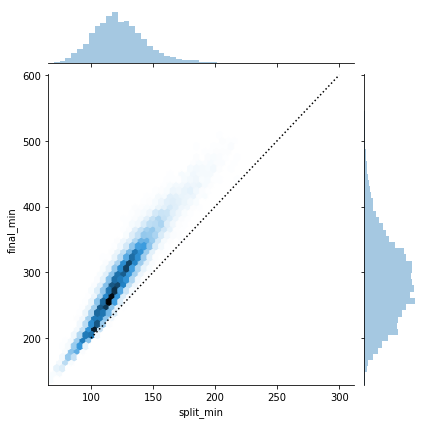

In [8]:
g = sns.jointplot(data=df, x='split_min', y='final_min', kind='hex')
g.ax_joint.plot(np.linspace(100, 300), np.linspace(200, 600), ':k')  # Make a reference y=2x line

In [9]:
df.head()

,age,gender,split,final,split_min,final_min
0,33,M,01:05:38,02:08:51,65.633333,128.850000
1,32,M,01:06:26,02:09:28,66.433333,129.466667
2,31,M,01:06:49,02:10:42,66.816667,130.700000
3,38,M,01:06:16,02:13:45,66.266667,133.750000
4,31,M,01:06:32,02:13:59,66.533333,133.983333


In [10]:
df['split_fract'] = 1 - 2 * df.split_min / df.final_min
df.head()

,age,gender,split,final,split_min,final_min,split_fract
0,33,M,01:05:38,02:08:51,65.633333,128.850000,-0.018756
1,32,M,01:06:26,02:09:28,66.433333,129.466667,-0.026262
2,31,M,01:06:49,02:10:42,66.816667,130.700000,-0.022443
3,38,M,01:06:16,02:13:45,66.266667,133.750000,0.009097
4,31,M,01:06:32,02:13:59,66.533333,133.983333,0.006842


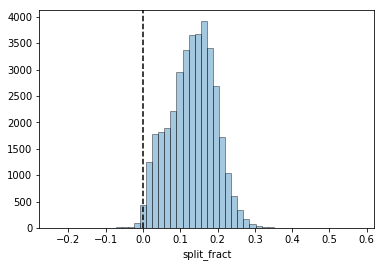

In [11]:
# Do a distplot of the split fract, don't show kernel density

sns.distplot(df['split_fract'], kde=False, hist_kws={'edgecolor': 'k'})
plt.axvline(0, color='k', linestyle='--');

In [12]:
sum(df.split_fract < 0)

251

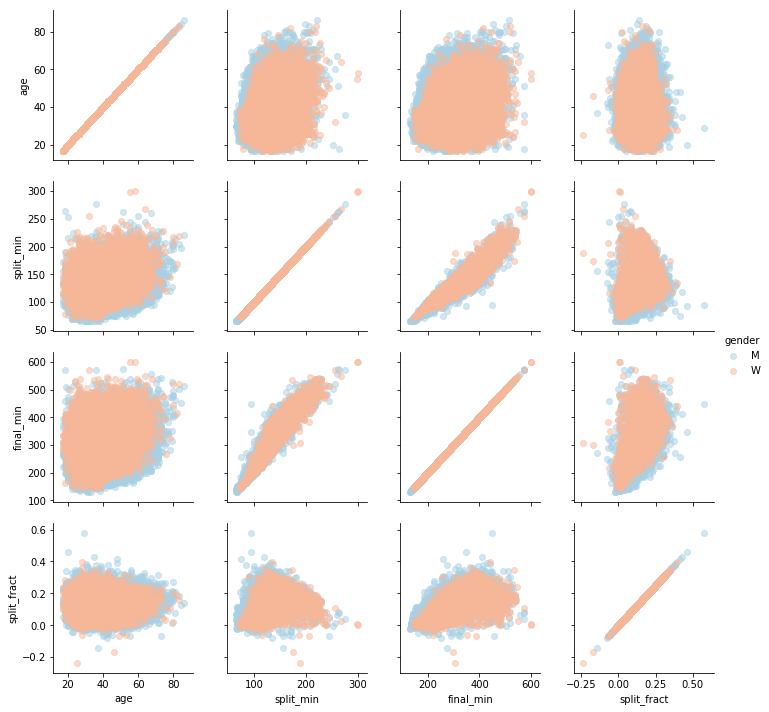

In [13]:
# Make a pairgrid.
g = sns.PairGrid(df, vars=['age', 'split_min', 'final_min', 'split_fract'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.5);
g.add_legend();

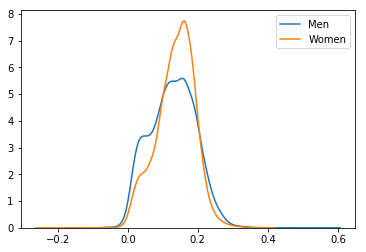

In [22]:
# Look at histogram of split fractions between men and women
sns.kdeplot(df.split_fract[df.gender=='M'], label='Men')
sns.kdeplot(df.split_fract[df.gender=='W'], label='Women')

In [20]:
df.split_fract[df.gender=='W']

28      -0.006587
30      -0.005608
32      -0.003200
40       0.015630
41       0.014932
45       0.019696
46       0.023807
47       0.012514
52       0.014480
56       0.013541
59       0.022616
61       0.009619
62       0.022330
63       0.020990
64       0.014467
67       0.027355
103      0.033834
114      0.023876
118      0.028142
123      0.031089
176      0.031293
196     -0.003953
209      0.028731
219      0.037014
228     -0.013856
258      0.009169
261      0.036456
266      0.012929
291      0.019390
329      0.028583
           ...   
37190    0.237770
37191    0.112814
37194    0.134512
37196    0.200039
37197    0.176356
37199    0.262211
37201    0.239136
37203    0.046715
37205    0.158490
37208    0.174165
37209    0.175694
37211    0.083042
37214    0.156521
37215    0.204413
37217    0.158334
37228    0.188558
37229    0.135351
37230    0.159015
37231    0.348746
37232    0.176719
37233    0.189796
37234    0.188904
37235    0.149088
37237    0.180730
37239    0